# Example on the MNIST Fashion Dataset

### 1. Import of the modules and the dataset

In [1]:
from neural_network import *
from utils import *
from keras.datasets import fashion_mnist

2023-09-08 12:30:36.357650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Load the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 3. Build the neural network

In [3]:
net = NeuralNetwork(
    Normalization(samples=X_train),
    Reshape(output_shape=(1, 28, 28)),
    Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
    BatchNorm2d(6),
    Tanh(),
    AvgPool2d(kernel_size=(2, 2), stride=(2, 2)),
    Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    BatchNorm2d(16),
    Tanh(),
    AvgPool2d(kernel_size=(2, 2), stride=(2, 2)),
    Flatten(),
    Linear(in_features=400, out_features=120),
    Tanh(),
    Linear(in_features=120, out_features=84),
    Tanh(),
    Linear(in_features=84, out_features=10),
    SoftmaxCategoricalCrossEntropy()
)
print(net)

NeuralNetwork:
 (0) Normalization(norm=255.0, dtype=float32)
 (1) Reshape(output_shape=(1, 28, 28))
 (2) Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), initialization=xavier)
 (3) BatchNorm2d(6, eps=1e-05, momentum=0.1)
 (4) Tanh()
 (5) AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
 (6) Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0), optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), initialization=xavier)
 (7) BatchNorm2d(16, eps=1e-05, momentum=0.1)
 (8) Tanh()
 (9) AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
 (10) Flatten()
 (11) Linear(in_features=400, out_features=120, optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), initialization=xavier)
 (12) Tanh()
 (13) Linear(in_features=120, out_features=84, optimizer=Adam(lr=0.001, lr_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-08), ini

### 4. Choose the number of samples to train on

In [4]:
# Select N samples to train on:
N = 5000
X_train, y_train = X_train[:N], y_train[:N]
X_train.shape, y_train.shape

((5000, 28, 28), (5000,))

### 5. Train the neural network

In [5]:
net.fit(X_train, y_train, epochs=5, batch_size=64, shuffle=True)

Training on 5000 samples:
Epoch    1 of 5    	 Average Error = 0.837611 	 Average Accuracy = 71.36%                                   
Epoch    2 of 5    	 Average Error = 0.531817 	 Average Accuracy = 81.46%                                   
Epoch    3 of 5    	 Average Error = 0.445637 	 Average Accuracy = 84.48%                                   
Epoch    4 of 5    	 Average Error = 0.396335 	 Average Accuracy = 85.84%                                   
Epoch    5 of 5    	 Average Error = 0.357831 	 Average Accuracy = 87.70%                                   
Training time : 00 hours, 00 minutes, 50 seconds


### 6. Make predictions on the test samples

In [6]:
# Prediction on the 10,000 test samples:
y_pred = net.predict(X_test, to="labels")
# Shows the first 10 predicted labels vs the true labels:
y_pred[:10], y_test[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 7, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

### 7. Evaluate the accuracy score

In [7]:
print(f"Accuracy score on the test set: {accuracy_score(y_test, y_pred):.2%}")

Accuracy score on the test set: 83.54%


### 8. Build a confusion matrix

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{cm}")

Confusion matrix:
[[788   4  22  60   3   4 112   0   7   0]
 [  0 963   5  23   3   0   6   0   0   0]
 [ 15   2 769  15  96   0 100   0   3   0]
 [ 20  21  11 896  15   0  35   0   2   0]
 [  0   6 145  67 655   0 121   0   6   0]
 [  0   0   0   1   0 919   0  48   3  29]
 [151   1 116  50  73   4 595   0   9   1]
 [  0   0   0   0   0  34   0 911   0  55]
 [  7   2  15   7   3   7  40   9 905   5]
 [  0   0   0   0   0  15   1  30   1 953]]


### 9. Displays a classification report

In [9]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(classification_report(cm, class_labels=class_labels, formatted=True))

┌───────────────────┬───────────┬───────────┬───────────┬───────────┐
│       Class       │ Precision │   Recall  │  F1-Score │  Support  │
├───────────────────┼───────────┼───────────┼───────────┼───────────┤
│    T-shirt/top    │  80.33%   │  78.80%   │  79.56%   │   1000    │
│      Trouser      │  96.40%   │  96.30%   │  96.35%   │   1000    │
│     Pullover      │  71.01%   │  76.90%   │  73.84%   │   1000    │
│       Dress       │  80.07%   │  89.60%   │  84.57%   │   1000    │
│       Coat        │  77.24%   │  65.50%   │  70.89%   │   1000    │
│      Sandal       │  93.49%   │  91.90%   │  92.69%   │   1000    │
│       Shirt       │  58.91%   │  59.50%   │  59.20%   │   1000    │
│      Sneaker      │  91.28%   │  91.10%   │  91.19%   │   1000    │
│        Bag        │  96.69%   │  90.50%   │  93.49%   │   1000    │
│    Ankle boot     │  91.37%   │  95.30%   │  93.29%   │   1000    │
└───────────────────┴───────────┴───────────┴───────────┴───────────┘


### 9. Displays some of the misclassified samples

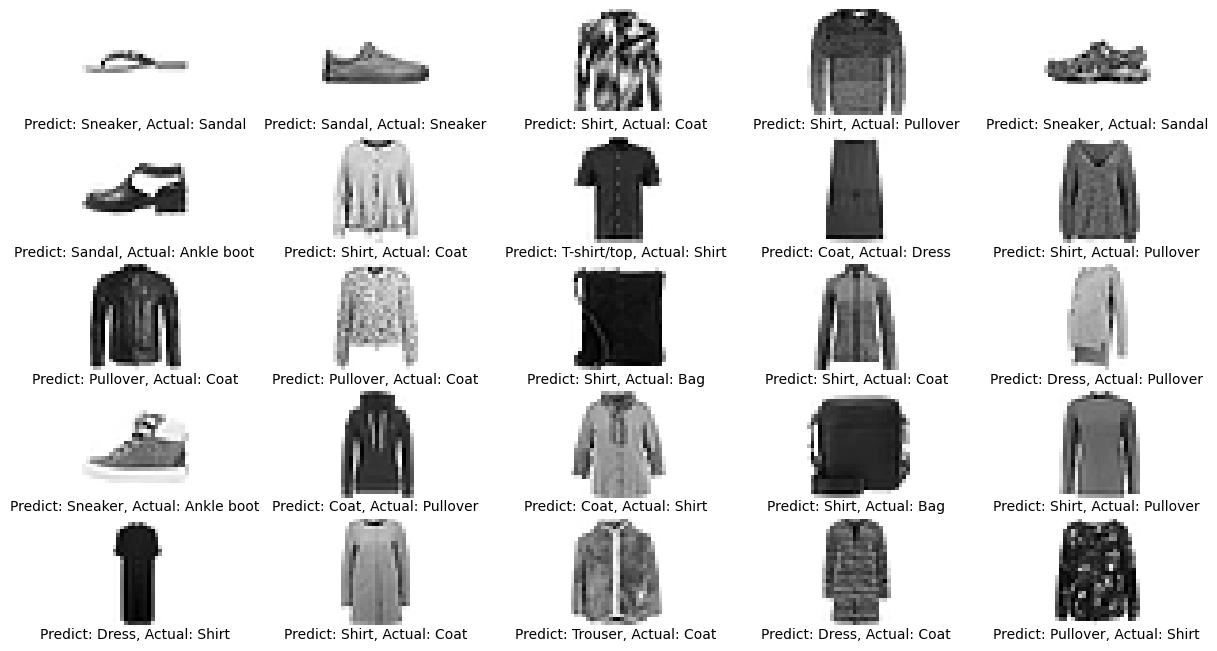

In [10]:
display_misclassified(X_test, y_test, y_pred, class_labels)